In [1]:
#Load necessary libraries
import pylab
%pylab inline
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


Populating the interactive namespace from numpy and matplotlib


C:\Users\Umar Ibn Ali\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
#load dataset in pandas
df= pd.read_csv("/Users/Umar Ibn Ali/Desktop/FYP/Model/Yemen_dataset.csv")

In [3]:
#check dataset
df.head()

,Year,GPI,GDP,No of country,Density,Population
0,1991,NaN,1158,4,24.0,29977
1,1992,NaN,1351,3,25.2,59680
2,1993,NaN,1558,3,26.5,54450
3,1994,NaN,1919,7,27.8,48306
4,1995,NaN,841,6,29.0,53453


In [4]:
df.describe()

,Year,GPI,GDP,No of country,Density,Population
count,26.000000,9.000000,26.000000,26.000000,26.000000,26.000000
mean,2003.500000,2.678889,983.269231,13.653846,37.811538,118744.192308
std,7.648529,0.304816,433.426031,5.775412,8.374644,81815.347213
min,1991.000000,2.324000,375.000000,3.000000,24.000000,29977.000000
25%,1997.250000,2.573000,569.500000,10.500000,31.325000,59879.250000
50%,2003.500000,2.629000,954.500000,16.000000,37.400000,75702.500000
75%,2009.750000,2.747000,1326.000000,17.000000,44.400000,185282.500000
max,2016.000000,3.399000,1919.000000,23.000000,52.200000,269796.000000


In [5]:
#fill column with missing values
df['GPI'].fillna(mean(df.GPI),inplace=True)


In [6]:
#check the columns with missing values
df.apply(lambda x: sum(x.isnull()),axis=0)

Year             0
GPI              0
GDP              0
No of country    0
Density          0
Population       0
dtype: int64

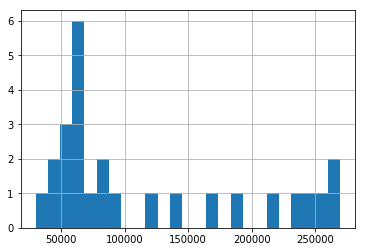

In [7]:
#check population histogram
df['Population'].hist(bins=25)

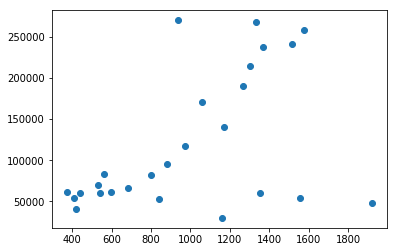

In [8]:
#check relationship between GDP and Population
import matplotlib.pyplot as plt
plt.scatter(df['GDP'], df['Population'])
plt.show() 

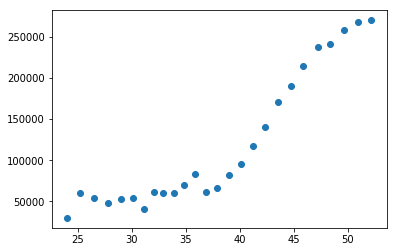

In [9]:
#check relationship between Density and Population
import matplotlib.pyplot as plt
plt.scatter(df['Density'], df['Population'])
plt.show() 

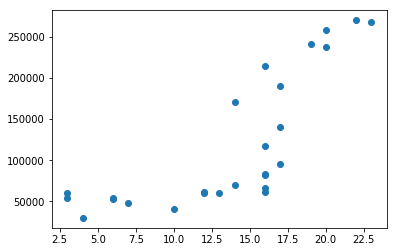

In [10]:
#check relationship between No of country and Population
plt.scatter(df['No of country'], df['Population'])
plt.show() 

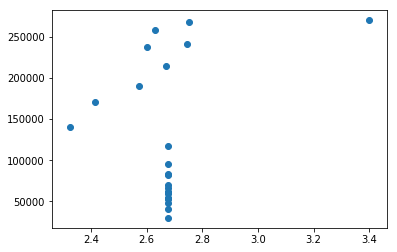

In [11]:
#check relationship between GPI and Population
plt.scatter(df['GPI'], df['Population'])
plt.show() 

In [12]:
#check GDP and Population linear relationship
feature_cols = ['GDP']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  29947.2792364
Coefficient:  [ 90.30783258]
R squared value:  0.228881802604


In [13]:
#check Density and Population linear relationship
feature_cols = ['Density']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  -223492.254031
Coefficient:  [ 9051.11138726]
R squared value:  0.858355054709


In [14]:
#check No of Country and Population linear relationship
feature_cols = ['No of country']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  -30550.0782252
Coefficient:  [ 10934.22826438]
R squared value:  0.595761822301


In [15]:
#check GPI and Population linear relationship
feature_cols = ['GPI']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  -176637.743236
Coefficient:  [ 110262.85441287]
R squared value:  0.0540026060514


In [16]:
# include all variables to build a model
X = df[['GDP', 'Density', 'No of country','GPI']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE-Root Mean Squared Error
print("RMSE Score: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE is the mean of the absolute value of the errors:
print("MAE Score: ",metrics.mean_absolute_error(y_test, y_pred))

#MSE is the mean of the squared errors:
print("MSE Score: ",metrics.mean_squared_error(y_test, y_pred))

#check R squared value
print("R squared value: ",lm2.score(X,y))

RMSE Score:  15662.2997192
MAE Score:  11979.7374032
MSE Score:  245307632.493
R squared value:  0.950691074171


In [17]:
# include all variables to build a model
X = df[['Density', 'No of country']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE-Root Mean Squared Error
print("RMSE Score: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE is the mean of the absolute value of the errors:
print("MAE Score: ",metrics.mean_absolute_error(y_test, y_pred))

#MSE is the mean of the squared errors:
print("MSE Score: ",metrics.mean_squared_error(y_test, y_pred))

#check R squared value
print("R squared value: ",lm2.score(X,y))

RMSE Score:  20522.2346998
MAE Score:  18091.3620569
MSE Score:  421162117.075
R squared value:  0.92525763031


In [18]:
# include 3 variables to build a model
X = df[['GDP', 'Density', 'No of country']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE-Root Mean Squared Error
print("RMSE Score: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE is the mean of the absolute value of the errors:
print("MAE Score: ",metrics.mean_absolute_error(y_test, y_pred))

#MSE is the mean of the squared errors:
print("MSE Score: ",metrics.mean_squared_error(y_test, y_pred))

#check R squared value
print("R squared value: ",lm2.score(X,y))

RMSE Score:  17453.7787734
MAE Score:  13908.5163861
MSE Score:  304634393.47
R squared value:  0.943434828594


In [19]:
#predict the GDP for future using a linear model with Year
from sklearn import linear_model
X = df[['Year']]
y = df[['GDP']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state=42)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

#R squared value
print("R squared value: ",lm2.score(X,y))

# Predict
pred_Den = [0,0,0,0,0,0]
for i in range (0,6):
    pred_Den[i] = lm2.predict(2017+i)

for i in range(0,6):
    print("Predicted GDP for year: ",(2017+i),pred_Den[i])
lm2.predict(2016)      

R squared value:  0.0572883649378
Predicted GDP for year:  2017 [[ 1168.57251603]]
Predicted GDP for year:  2018 [[ 1181.67942041]]
Predicted GDP for year:  2019 [[ 1194.78632479]]
Predicted GDP for year:  2020 [[ 1207.89322917]]
Predicted GDP for year:  2021 [[ 1221.00013355]]
Predicted GDP for year:  2022 [[ 1234.10703793]]


array([[ 1155.46561165]])

In [20]:
#predict the Density for future using a linear model with Year
from sklearn import linear_model
X = df[['Year']]
y = df[['Density']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

#R squared value
print("R squared value: ",lm2.score(X,y))

# Predict
pred_Den = [0,0,0,0,0,0]
for i in range (0,6):
    pred_Den[i] = lm2.predict(2017+i)

for i in range(0,6):
    print("Predicted Density for year: ",(2017+i),pred_Den[i])
lm2.predict(2016)      

R squared value:  0.997970735571
Predicted Density for year:  2017 [[ 52.6865905]]
Predicted Density for year:  2018 [[ 53.78637981]]
Predicted Density for year:  2019 [[ 54.88616912]]
Predicted Density for year:  2020 [[ 55.98595842]]
Predicted Density for year:  2021 [[ 57.08574773]]
Predicted Density for year:  2022 [[ 58.18553704]]


array([[ 51.5868012]])

In [21]:
#predict the No of Country for future using a linear model with Year
from sklearn import linear_model
X = df[['Year']]
y = df[['No of country']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

#R squared value
print("R squared value: ",lm2.score(X,y))

# Predict
pred_Den = [0,0,0,0,0,0]
for i in range (0,6):
    pred_Den[i] = lm2.predict(2017+i)

for i in range(0,6):
    print("Predicted No of country for year: ",(2017+i),pred_Den[i])
lm2.predict(2016)      

R squared value:  0.880237165967
Predicted No of country for year:  2017 [[ 23.34881543]]
Predicted No of country for year:  2018 [[ 24.04738271]]
Predicted No of country for year:  2019 [[ 24.74595]]
Predicted No of country for year:  2020 [[ 25.44451728]]
Predicted No of country for year:  2021 [[ 26.14308456]]
Predicted No of country for year:  2022 [[ 26.84165184]]


array([[ 22.65024815]])

In [22]:
# Forecasted Population of Yemen
X = df[['Density','No of country']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)
    

    
var_2017 = [[52.6865905,23.34881543]]
var_2018 = [[53.78637981,24.04738271]]
var_2019 = [[54.88616912,24.74595]]                               
var_2020 = [[55.98595842,25.44451728]]
var_2021 = [[57.08574773, 26.14308456]]
var_2022 = [[58.18553704,26.84165184]]

print("Predicted Population for year 2017: ",lm2.predict(var_2017))
print("Predicted Population for year 2018: ",lm2.predict(var_2018))
print("Predicted Population for year 2019: ",lm2.predict(var_2019))
print("Predicted Population for year 2020: ",lm2.predict(var_2020))
print("Predicted Population for year 2021: ",lm2.predict(var_2021))
print("Predicted Population for year 2022: ",lm2.predict(var_2022))



Predicted Population for year 2017:  [ 253711.23676041]
Predicted Population for year 2018:  [ 263719.30414965]
Predicted Population for year 2019:  [ 273727.37141963]
Predicted Population for year 2020:  [ 283735.43864212]
Predicted Population for year 2021:  [ 293743.50603137]
Predicted Population for year 2022:  [ 303751.57342061]


In [23]:
lm2.predict([[51.5868012,22.65024815]])

array([ 243703.16953792])